<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Series de Tiempo </font> </center>

Las **series de tiempo** son secuencias de datos recolectados y ordenados cronológicamente, donde el orden temporal es fundamental. Ejemplos típicos incluyen precios de acciones, registros de sensores, datos meteorológicos, ventas diarias, señales biomédicas, entre otros.

En ciencia de datos, **extraer características** relevantes de series de tiempo es crucial para mejorar el rendimiento de modelos predictivos y descubrir patrones subyacentes. Las características extraídas pueden capturar tendencias, estacionalidad, periodicidad, anomalías y otras propiedades útiles para tareas de clasificación, regresión, detección de anomalías y clustering. 

La librería de Pandas  contiene un extenso conjunto de herramientas para trabajar con fechas, horas y datos indexados en el tiempo.
Los datos de fecha y hora vienen en varios tipos de objetos:

- **Timestamps** (marcas de tiempo) hacen referencia a momentos particulares en el tiempo (por ejemplo, 4 de julio de 2021 a las 7:00 a.m.).
  
- **Intervalos de tiempo** y **periodos** hacen referencia a una longitud de tiempo entre un punto de inicio y uno final; por ejemplo, el mes de junio de 2021. Los periodos suelen ser un caso especial de intervalos de tiempo en los que cada intervalo es de longitud uniforme y no se superponen (por ejemplo, periodos de 24 horas que comprenden días).

- **Time deltas** o **duraciones** hacen referencia a una longitud exacta de tiempo (por ejemplo, una duración de 22.56 segundos).


### Fechas y Horas

Los objetos básicos de Python para trabajar con fechas y horas residen en el módulo incorporado `datetime`.
Junto con el módulo externo `dateutil`, resultan útiles para realizar rápidamente una gran cantidad de funcionalidades sobre fechas y horas.


In [1]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [3]:
# Una vez que se tiene un objeto `datetime`, se puede hacer cosas como imprimir el día de la semana
date.strftime('%A')

'Sunday'

Hay códigos estándar de formato de cadena para imprimir fechas (`'%A'` [sección strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)) se pueden ver en [documentación de `datetime` de Python](https://docs.python.org/3/library/datetime.html).

Algunos links importantes sobre la documentación se pueden encontrar en:  [``dateutil``](http://labix.org/python-dateutil).

Un paquete relacionado a tener en cuenta es [`pytz`](http://pytz.sourceforge.net/), que contiene herramientas para trabajar con el elemento más problemático de los datos de series de tiempo: las zonas horarias.

El poder de `datetime` y `dateutil` radica en su flexibilidad y sintaxis sencilla: se pueden usar estos objetos y sus métodos incorporados para realizar fácilmente casi cualquier operación.

Donde fallan es cuando se desea trabajar con grandes arreglos de fechas y horas. Sin embargo, así como las listas de Python son subóptimas comparadas con los arreglos de NumPy, las listas de objetos `datetime` de Python son subóptimas comparadas con los arreglos de datetime.

### Arreglos datetime64 de NumPy

El tipo `datetime64` de NumPy codifica fechas como enteros de 64 bits, y así permite que los arreglos de fechas se representen de manera compacta y se operen de manera eficiente.
El tipo `datetime64` requiere un formato de entrada específico:

In [4]:
import numpy as np
date = np.array('2021-07-04', dtype=np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

In [5]:
#Una vez que tenemos fechas en esta forma, podemos hacer rápidamente operaciones sobre ellas:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

Debido al tipo uniforme en los arreglos `datetime64` de NumPy, este tipo de operación puede lograrse mucho más rápido que si trabajáramos directamente con objetos `datetime` de Python, especialmente a medida que los arreglos crecen.

Un detalle de los objetos `datetime64` y `timedelta64` relacionados es que se basan en una *unidad de tiempo fundamental*.
Debido a que el objeto `datetime64` está limitado a precisión de 64 bits, el rango de tiempos codificables es $2^{64}$ veces esta unidad fundamental.
En otras palabras, `datetime64` impone una compensación entre *resolución temporal* y *máximo rango temporal*.

Por ejemplo, si queremos una resolución temporal de 1 nanosegundo, solo se tiene suficiente información para codificar un rango de $2^{64}$ nanosegundos, o poco menos de 600 años.


In [6]:
#NumPy inferirá la unidad deseada a partir de la entrada.
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [7]:
#Aquí hay un datetime basado en minutos:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [8]:
#Se puede forzar cualquier unidad fundamental deseada usando códigos de formato; por ejemplo, aquí forzaremos un tiempo basado en nanosegundos:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

La siguiente tabla (tomada de la documentación de `datetime64` de NumPy) lista los códigos de formato disponibles junto con los rangos relativos y absolutos de tiempo que pueden codificar:

|Código| Significado   | Rango de tiempo (relativo) | Rango de tiempo (absoluto)   |
|------|--------------|----------------------------|------------------------------|
| `Y`  | Año          | ± 9.2e18 años              | [9.2e18 AC, 9.2e18 DC]       |
| `M`  | Mes          | ± 7.6e17 años              | [7.6e17 AC, 7.6e17 DC]       |
| `W`  | Semana       | ± 1.7e17 años              | [1.7e17 AC, 1.7e17 DC]       |
| `D`  | Día          | ± 2.5e16 años              | [2.5e16 AC, 2.5e16 DC]       |
| `h`  | Hora         | ± 1.0e15 años              | [1.0e15 AC, 1.0e15 DC]       |
| `m`  | Minuto       | ± 1.7e13 años              | [1.7e13 AC, 1.7e13 DC]       |
| `s`  | Segundo      | ± 2.9e12 años              | [ 2.9e9 AC, 2.9e9 DC]        |
| `ms` | Milisegundo  | ± 2.9e9 años               | [ 2.9e6 AC, 2.9e6 DC]        |
| `us` | Microsegundo | ± 2.9e6 años               | [290301 AC, 294241 DC]       |
| `ns` | Nanosegundo  | ± 292 años                 | [ 1678 DC, 2262 DC]          |
| `ps` | Picosegundo  | ± 106 días                 | [ 1969 DC, 1970 DC]          |
| `fs` | Femtosegundo | ± 2.6 horas                | [ 1969 DC, 1970 DC]          |
| `as` | Atosegundo   | ± 9.2 segundos             | [ 1969 DC, 1970 DC]          |

Para los tipos de datos que vemos en el mundo real, un valor por defecto útil es `datetime64[ns]`, ya que puede codificar un rango útil de fechas modernas con una precisión suficientemente fina.


### Fechas y horas en Pandas

Pandas se basa en todas las herramientas discutidas para proporcionar un objeto `Timestamp`, que combina la facilidad de uso de `datetime` y `dateutil` con el almacenamiento eficiente y la interfaz vectorizada de `numpy.datetime64`.

A partir de un grupo de estos objetos `Timestamp`, Pandas puede construir un `DatetimeIndex` que puede usarse para indexar datos en una `Series` o `DataFrame`.

In [9]:
# Podemos analizar una cadena de fecha con formato flexible y usar códigos de formato para mostrar el día de la semana, como sigue:
import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [10]:
date.strftime('%A')

'Sunday'

In [11]:
#se pueden hacer operaciones vectorizadas al estilo NumPy
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

### Series de tiempo en Pandas

Las herramientas de series de tiempo de Pandas se vuelven útiles cuando se quiere indexar datos por etiquetas de tiempo.


In [12]:
#objeto `Series` que tenga datos indexados en el tiempo
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [13]:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [14]:
#indexado solo por fecha, pasar un año para obtener un segmento de todos los datos de ese año
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

### Estructuras de datos de series de tiempo en Pandas

- Para **timestamps**, Pandas proporciona el tipo `Timestamp`. Es un reemplazo para el `datetime` nativo de Python, pero está basado en el tipo de dato más eficiente `numpy.datetime64`. La estructura de índice asociada es `DatetimeIndex`.
- Para **periodos de tiempo**, Pandas proporciona el tipo `Period`. Esto codifica un intervalo de frecuencia fija basado en `numpy.datetime64`. El índice asociado es `PeriodIndex`.
- Para **time deltas** o **duraciones**, Pandas proporciona el tipo `Timedelta`. `Timedelta` es un reemplazo más eficiente para el tipo nativo `datetime.timedelta` de Python, y está basado en `numpy.timedelta64`. El índice asociado es `TimedeltaIndex`.

Los objetos más fundamentales de fecha/hora son los objetos `Timestamp` y `DatetimeIndex`.
Aunque estos objetos de clase pueden invocarse directamente, es más común usar la función `pd.to_datetime`, que puede analizar una amplia variedad de formatos.
Pasar una sola fecha a `pd.to_datetime` produce un `Timestamp`, pasar una serie de fechas por defecto produce un `DatetimeIndex`

In [15]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                       '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [16]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [17]:
#Un TimedeltaIndex se crea, por ejemplo, cuando se resta una fecha de otra
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Secuencias regulares (pd.date_range)

Para facilitar la creación de secuencias regulares de fechas, Pandas ofrece algunas funciones para este propósito: `pd.date_range` para timestamps, `pd.period_range` para periodos y `pd.timedelta_range` para time deltas.
Los métodos `range` de Python y el `np.arange` de NumPy toman un punto de inicio, un punto final y un tamaño de paso opcional y devuelven una secuencia.
De manera similar, `pd.date_range` acepta una fecha de inicio, una fecha de fin y un código de frecuencia opcional para crear una secuencia regular de fechas:

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
#Alternativamente, el rango de fechas puede especificarse no con un punto de inicio y uno final, sino con un punto de inicio y un número de periodos
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#El espaciado puede modificarse alterando el argumento freq, que por defecto es D
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\414439410.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [21]:
#Para crear secuencias regulares de valores Period o Timedelta, las funciones similares pd.period_range y pd.timedelta_range son útiles
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [22]:
#Y una secuencia de duraciones que aumentan por una hora
pd.timedelta_range(0, periods=6, freq='H')

C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\320775003.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')

### Frecuencias y desplazamientos (Offsets)

El concepto de *frecuencia* o *desplazamiento de fecha* (offset) es fundamental para series de tiempo en Pandas. La siguiente tabla resume los principales códigos disponibles, como con los códigos `D` (día) y `H` (hora) demostrados en las secciones anteriores, podemos usarlos para especificar cualquier espaciado de frecuencia deseado:

| Código | Descripción         | Código | Descripción              |
|--------|---------------------|--------|--------------------------|
| `D`    | Día calendario      | `B`    | Día hábil                |
| `W`    | Semanal             |        |                          |
| `M`    | Fin de mes          | `BM`   | Fin de mes hábil         |
| `Q`    | Fin de trimestre    | `BQ`   | Fin de trimestre hábil   |
| `A`    | Fin de año          | `BA`   | Fin de año hábil         |
| `H`    | Horas               | `BH`   | Horas hábiles            |
| `T`    | Minutos             |        |                          |
| `S`    | Segundos            |        |                          |
| `L`    | Milisegundos        |        |                          |
| `U`    | Microsegundos       |        |                          |
| `N`    | Nanosegundos        |        |                          |

Las frecuencias mensuales, trimestrales y anuales están marcadas al final del periodo especificado.
Agregar un sufijo `S` a cualquiera de estos hace que se marquen al inicio:

| Código  | Descripción           | Código  | Descripción                |
|---------|-----------------------|---------|----------------------------|
| `MS`    | Inicio de mes         |`BMS`    | Inicio de mes hábil        |
| `QS`    | Inicio de trimestre   |`BQS`    | Inicio de trimestre hábil  |
| `AS`    | Inicio de año         |`BAS`    | Inicio de año hábil        |

Además, se puede cambiar el mes usado para marcar cualquier código trimestral o anual agregando un código de mes de tres letras como sufijo:

- `Q-JAN`, `BQ-FEB`, `QS-MAR`, `BQS-APR`, etc.
- `A-JAN`, `BA-FEB`, `AS-MAR`, `BAS-APR`, etc.

De la misma manera, el punto de corte de la frecuencia semanal puede modificarse agregando un código de día de la semana de tres letras:

- `W-SUN`, `W-MON`, `W-TUE`, `W-WED`, etc.

Además, los códigos pueden combinarse con números para especificar otras frecuencias.
Por ejemplo, para una frecuencia de 2 horas y 30 minutos, podemos combinar los códigos de hora (`H`) y minuto (`T`) así:

In [23]:
pd.timedelta_range(0, periods=6, freq="2H30T")

C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\22847273.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq="2H30T")
C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\22847273.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=6, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150min')

Todos estos códigos cortos se refieren a instancias específicas de desplazamientos de series de tiempo de Pandas, que pueden encontrarse en el módulo `pd.tseries.offsets`.
Por ejemplo, podemos crear un desplazamiento de un día hábil

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

la documentación de uso de frecuencias y desplazamientos se puede encontrar en: [`DateOffset`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

### Remuestreo, desplazamiento y ventanas móviles


In [25]:
#!pip install pandas-datareader --user

In [26]:
#!pip install yfinance --user

In [27]:
import yfinance as yf
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-01-02')
sp500.head()

C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\2104338410.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-01-02')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2018-01-02,2695.810059,2695.889893,2682.360107,2683.729980,3397430000
2018-01-03,2713.060059,2714.370117,2697.770020,2697.850098,3544030000
2018-01-04,2723.989990,2729.290039,2719.070068,2719.310059,3697340000
2018-01-05,2743.149902,2743.449951,2727.919922,2731.330078,3239280000
2018-01-08,2747.709961,2748.510010,2737.600098,2742.669922,3246160000


In [28]:
sp500 = sp500['Close']

In [29]:
sp500

Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961
...,...
2021-12-27,4791.189941
2021-12-28,4786.350098
2021-12-29,4793.060059


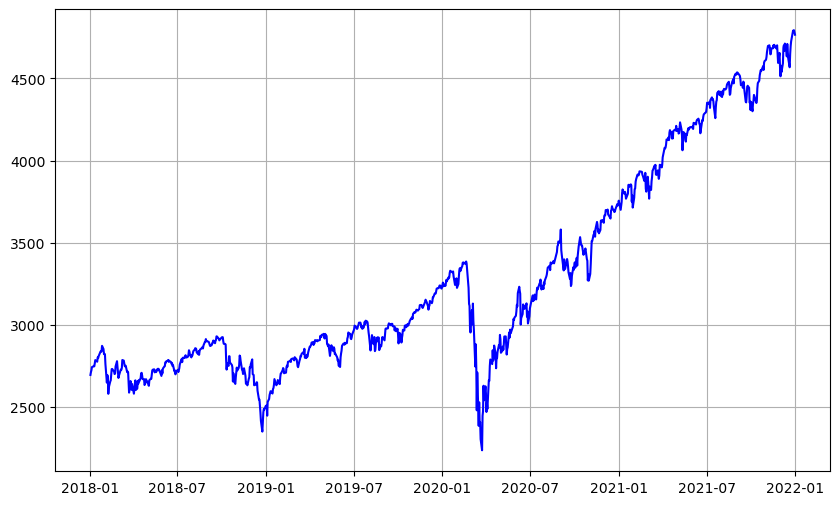

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(sp500, '-b')
plt.grid()
plt.show()

### Remuestreo y conversión de frecuencias

Una necesidad común al trabajar con datos de series de tiempo es remuestrear a una frecuencia mayor o menor.
Esto puede hacerse usando el método `resample`, o el método mucho más simple `asfreq`.
La diferencia principal entre ambos es que `resample` es fundamentalmente una **agregación de datos**, mientras que `asfreq` es fundamentalmente una **selección de datos**.


C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\1302925925.py:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  plt.plot(sp500.resample('BA').mean(), ':r')
C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\1302925925.py:4: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  plt.plot(sp500.asfreq('BA'), '--g')


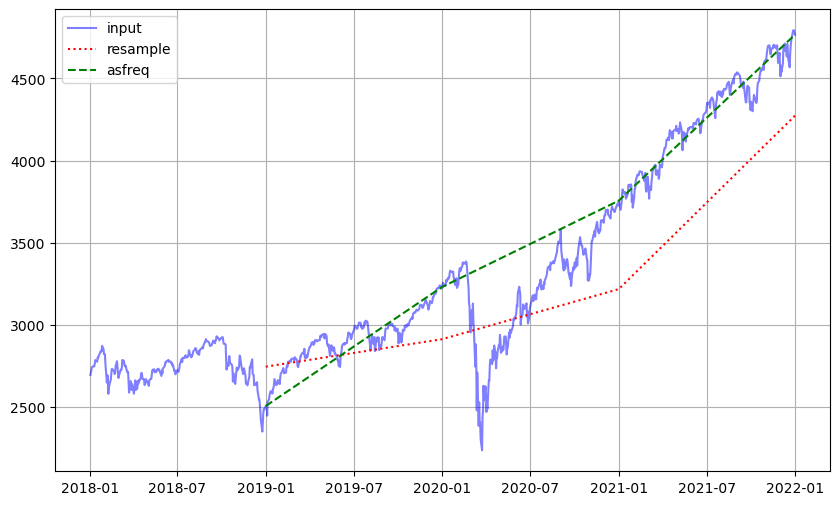

In [31]:
plt.figure(figsize=(10,6))
plt.plot(sp500, '-b', alpha=0.5)
plt.plot(sp500.resample('BA').mean(), ':r')
plt.plot(sp500.asfreq('BA'), '--g')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')
plt.grid()
plt.show()

en cada punto, `resample` reporta el *promedio del año anterior*, mientras que `asfreq` reporta el *valor al final del año*.

Para remuestreo hacia arriba, `resample` y `asfreq` son en gran medida equivalentes, aunque `resample` tiene muchas más opciones disponibles.
En este caso, el valor por defecto para ambos métodos es dejar los puntos remuestreados vacíos (valores NAN).
`asfreq` acepta un argumento `method` para especificar cómo se imputan los valores.


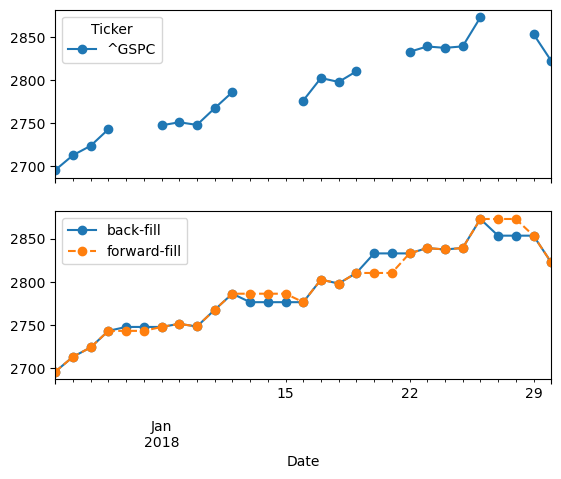

In [32]:
# remuestrearemos los datos de días hábiles a frecuencia diaria (es decir, incluyendo fines de semana)
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

Como los datos del S&P 500 solo existen para días hábiles, en la parte superior de la señal podemos ver que se tienen "huecos" que representan valores NAN. La parte inferior muestra las diferencias entre dos estrategias para imputar los NaNs: rellenado hacia adelante y hacia atrás.

### Desplazamientos temporales (Time Shifts)

Otra operación común específica de series de tiempo es el desplazamiento de datos en el tiempo.
Para esto, Pandas proporciona el método `shift`, que puede usarse para desplazar datos por un número dado de entradas.
Con datos de series de tiempo muestreados a una frecuencia regular, esto nos da una forma de explorar tendencias a lo largo del tiempo.


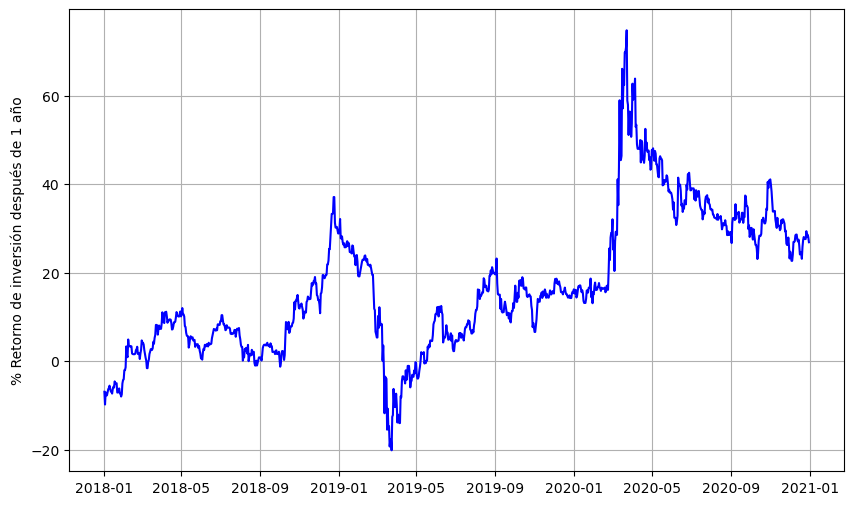

In [33]:
sp500 = sp500.asfreq('D', method='pad')

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
plt.figure(figsize=(10,6))
plt.plot(ROI, '-b')
plt.ylabel('% Retorno de inversión después de 1 año');
plt.grid()
plt.show()

Se puede observar en la imagen que el peor retorno a un año fue alrededor de marzo de 2019, con la caída del mercado relacionada con el coronavirus exactamente un año después. Como se podría esperar, el mejor retorno a un año se encontró en marzo de 2020, para quienes tuvieron la previsión o suerte de comprar más barato.

### Ventanas móviles (Rolling Windows)

Calcular estadísticas móviles es un tercer tipo de operación específica de series de tiempo implementada por Pandas.
Esto puede lograrse mediante el atributo `rolling` de los objetos `Series` y `DataFrame`, que devuelve una vista similar a la operación `groupby`.
Esta vista móvil hace disponibles varias operaciones de agregación por defecto.

In [34]:
sp500['^GSPC']

Date
2018-01-02    2695.810059
2018-01-03    2713.060059
2018-01-04    2723.989990
2018-01-05    2743.149902
2018-01-06    2743.149902
                 ...     
2021-12-27    4791.189941
2021-12-28    4786.350098
2021-12-29    4793.060059
2021-12-30    4778.729980
2021-12-31    4766.180176
Freq: D, Name: ^GSPC, Length: 1460, dtype: float64

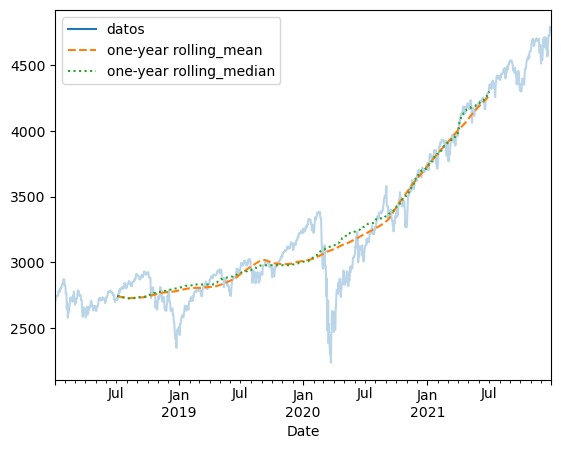

In [35]:
#podemos ver la media y mediana móvil centrada de un año de los precios de las acciones
rolling = sp500['^GSPC'].rolling(365, center=True)

data = pd.DataFrame({'datos': sp500['^GSPC'],
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_median': rolling.median()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

Como con las operaciones `groupby`, los métodos `aggregate` y `apply` pueden usarse para cálculos de ventanas móviles.

## 1. Estadísticas básicas y de Ventana Móvil
- Media, mediana, desviación estándar, varianza, máximo, mínimo, rango.
- Estadísticas sobre ventanas móviles (rolling window): capturan cambios locales y tendencias.

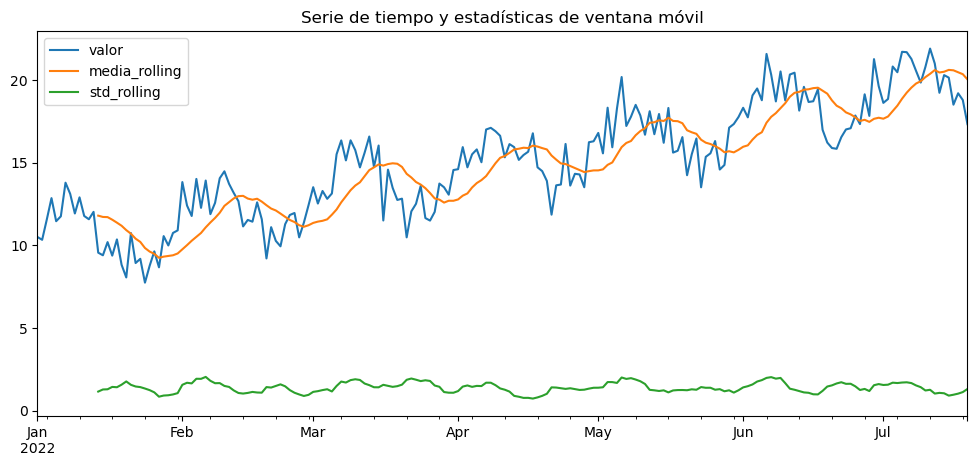

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de una serie de tiempo (ejemplo: ventas diarias)
np.random.seed(42)
n = 200
t = np.arange(n)
serie = 10 + 0.05*t + 2*np.sin(2*np.pi*t/30) + np.random.normal(0, 1, n)
df = pd.DataFrame({'valor': serie}, index=pd.date_range('2022-01-01', periods=n))

# Estadísticas globales
media = df['valor'].mean()
std = df['valor'].std()
maximo = df['valor'].max()
minimo = df['valor'].min()

# Estadísticas de ventana móvil
ventana = 14
df['media_rolling'] = df['valor'].rolling(window=ventana).mean()
df['std_rolling'] = df['valor'].rolling(window=ventana).std()

df[['valor', 'media_rolling', 'std_rolling']].plot(figsize=(12,5))
plt.title('Serie de tiempo y estadísticas de ventana móvil')
plt.show()

## 2. Características de tendencia y estacionalidad
- Pendiente de tendencia (regresión lineal simple).
- Amplitud y periodo de estacionalidad (descomposición o autocorrelación).
- Detección de cambios de tendencia (breakpoints).

In [37]:
from scipy import stats
# Tendencia: regresión lineal
x = np.arange(n)
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(x, df['valor'])
print(f'Pendiente de tendencia: {pendiente:.3f}')

# Estacionalidad: autocorrelación
autocorr_30 = df['valor'].autocorr(lag=30)
print(f'Autocorrelación con lag=30: {autocorr_30:.3f}')

Pendiente de tendencia: 0.051
Autocorrelación con lag=30: 0.899


## 3.- Características del dominio de la frecuencia

La extracción de características del dominio de la frecuencia implica transformar los datos de series de tiempo en el dominio de la frecuencia utilizando técnicas como la Transformada Rápida de Fourier (FFT).

La FFT transforma los datos de series de tiempo en el dominio de la frecuencia, lo que da como resultado valores complejos que representan amplitudes de componentes sinusoidales en varias frecuencias.

- **np.fft.fftfreq(len(fft_values))** : Calcula las frecuencias correspondientes para los valores FFT.
- **psd = np.abs(fft_values) ** 2**: Calcula la densidad espectral de potencia (PSD) tomando el cuadrado de la magnitud de los valores de FFT. La PSD representa la distribución de la potencia en los componentes de frecuencia de la serie temporal.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from statsmodels.tsa.seasonal import seasonal_decompose

# serie de tiempo
np.random.seed(42)
time = np.arange(0, 100)
data = np.sin(0.2 * time) + np.sin(0.5 * time) + np.random.normal(size=100)

df = pd.DataFrame({'time': time, 'data': data})

# Transformada rápida de fourier
fft_values = fft(df['data'].values)
fft_frequencies = np.fft.fftfreq(len(fft_values))

# Espectro de potencia
psd = np.abs(fft_values) ** 2


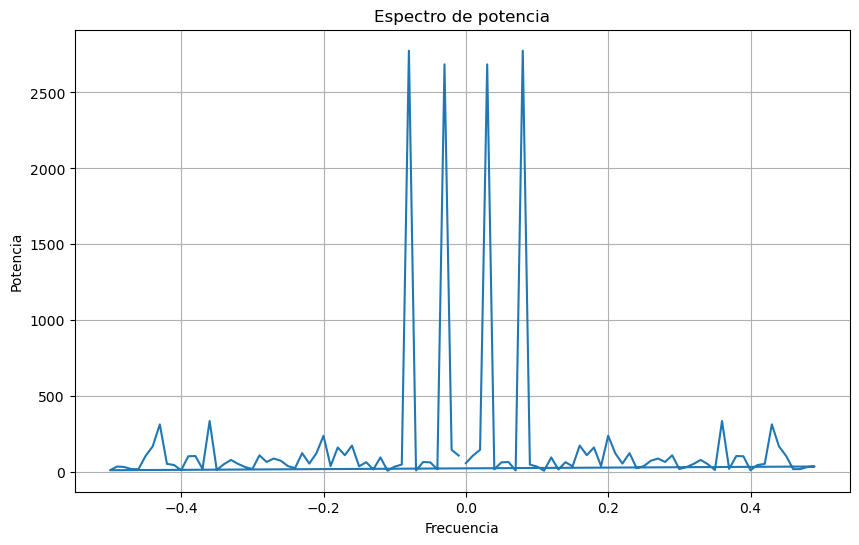

Peak Frequencies: [-0.36  0.03 -0.03 -0.08  0.08]


In [39]:
plt.figure(figsize=(10, 6))
plt.plot(fft_frequencies, psd)
plt.title('Espectro de potencia')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.grid(True)
plt.show()

# Picos de frecuencia
peak_freq = fft_frequencies[np.argsort(psd)[-5:]]  # Top 5 
print("Peak Frequencies:", peak_freq)

## Ejemplo: Intervalos

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression

In [41]:
data=pd.read_csv('h2o.csv')
data.head()

,x,fecha
0,0.429795,1991-07-01
1,0.400906,1991-08-01
2,0.432159,1991-09-01
3,0.492543,1991-10-01
4,0.502369,1991-11-01


In [42]:
data.tail()

,x,fecha
199,0.761822,2008-02-01
200,0.649435,2008-03-01
201,0.827887,2008-04-01
202,0.816255,2008-05-01
203,0.762137,2008-06-01


In [43]:
data['fecha'].dtype

dtype('O')

In [44]:
data['fecha']=pd.to_datetime(data['fecha'])
data['año']=data.fecha.dt.year
data['mes']=data.fecha.dt.month
data.head()

,x,fecha,año,mes
0,0.429795,1991-07-01,1991,7
1,0.400906,1991-08-01,1991,8
2,0.432159,1991-09-01,1991,9
3,0.492543,1991-10-01,1991,10
4,0.502369,1991-11-01,1991,11


In [45]:
datetime.datetime.timestamp(data['fecha'][0])

678348000.0

<Axes: >

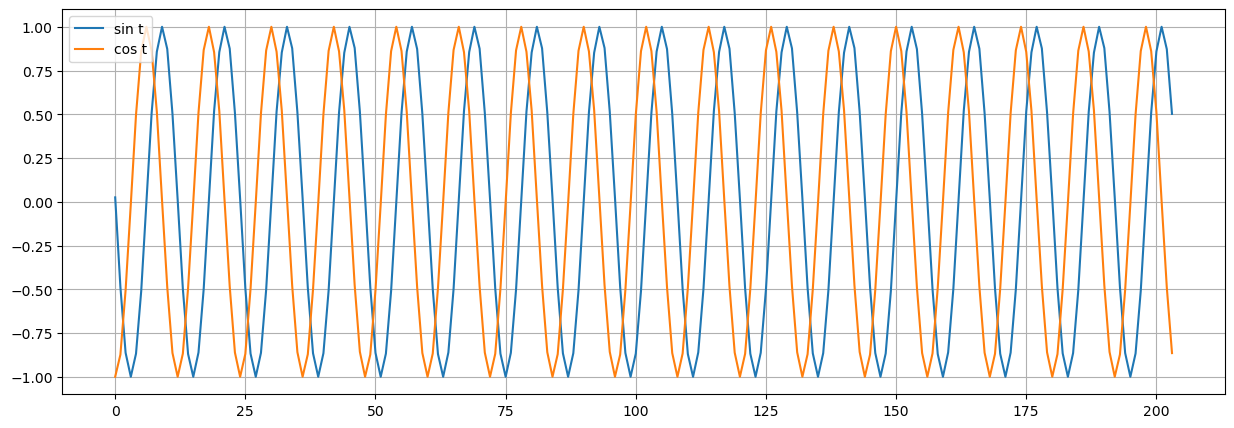

In [46]:
data['seg']=data['fecha'].map(datetime.datetime.timestamp)
w=data['seg']/(60*60*24*365.2425)*2*np.pi #un año es 31536000 seg
data['sin t']=np.sin(w)
data['cos t']=np.cos(w)
data[['sin t','cos t']].plot(grid=True,figsize=(15,5))

<Axes: >

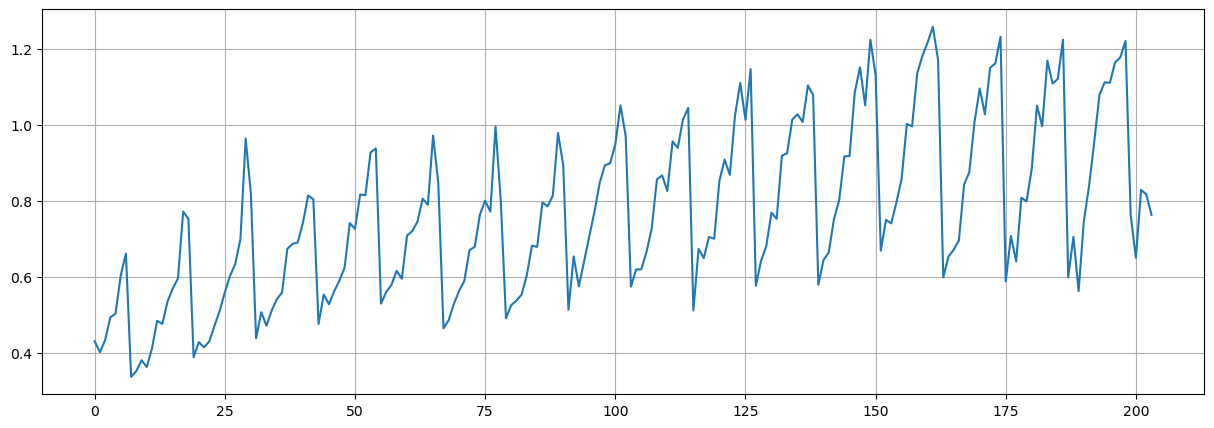

In [47]:
data['x'].plot(grid=True,figsize=(15,5))

#### Extracción de características por intervalos

In [48]:
data.head(2)

,x,fecha,año,mes,seg,sin t,cos t
0,0.429795,1991-07-01,1991,7,678348000.0,0.025178,-0.999683
1,0.400906,1991-08-01,1991,8,681026400.0,-0.486523,-0.873668


In [49]:
me=[]
std=[]
tendencia=[]
w=6
x=data['x']
lin=LinearRegression()
for i in range(len(x)-w):
    me.append(x[i:i+w].mean())
    std.append(x[i:i+w].std())
    t=data['seg'][i:i+w].values/(60*60*24*365.2425)
    lin.fit(t.reshape(-1,1),x[i:i+w])
    tendencia.append(lin.coef_[0])

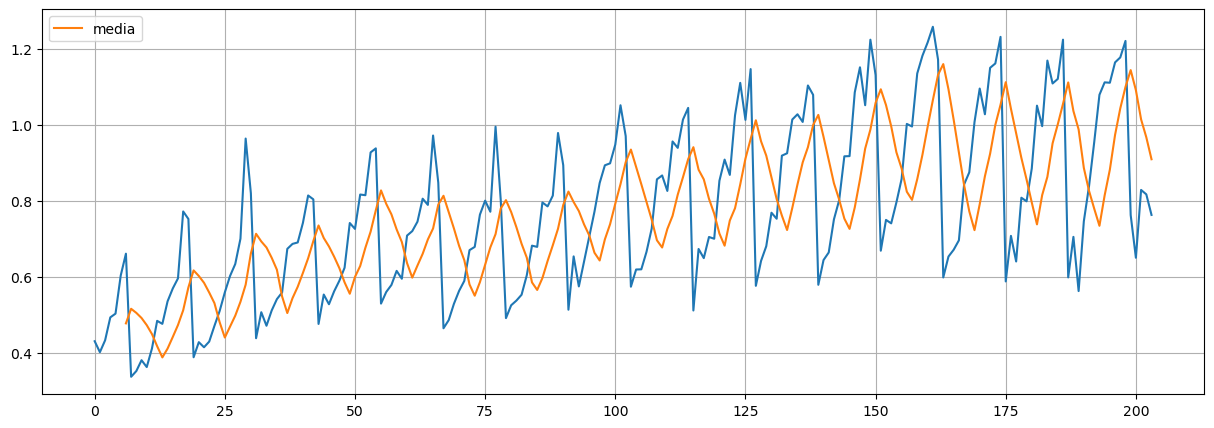

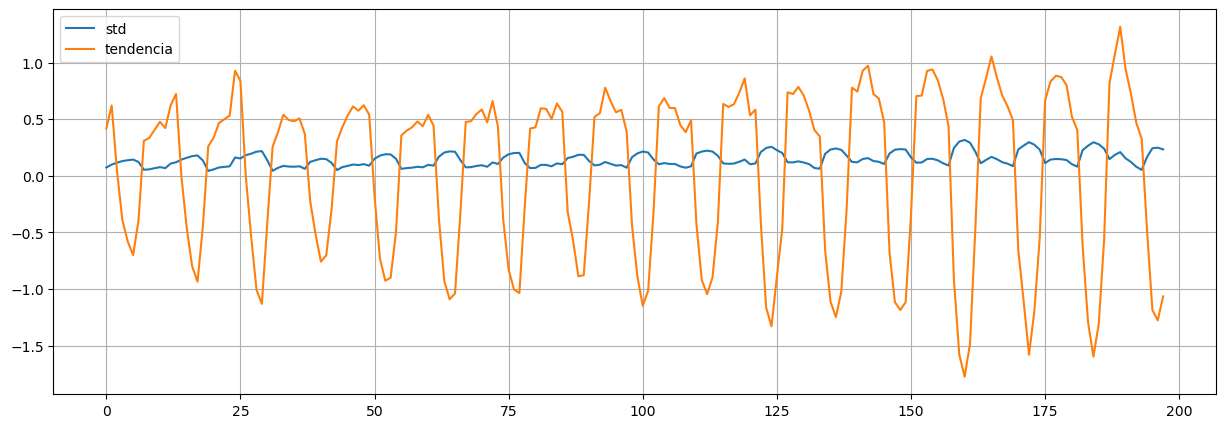

In [50]:
plt.figure(figsize=(15,5))
plt.plot(x)
plt.plot(data.index[w:],me,label='media')
plt.legend()
plt.grid()

plt.figure(figsize=(15,5))
plt.plot(std,label='std')
plt.plot(tendencia,label='tendencia')
plt.legend()
plt.grid()

In [51]:
#!pip install tensorflow --user

In [52]:
#pip --version

In [53]:
from scipy.stats import zscore

In [54]:
X=zscore(np.array([me,std,tendencia,data['sin t'].values[w:],data['cos t'].values[w:]]).T)
Y=zscore(data['x'][w:])
X.shape,Y.shape

((198, 5), (198,))

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [56]:
nnet=keras.Sequential([
                       keras.Input(shape=(5,)),
                       layers.Dense(5,activation=tf.nn.tanh),
                       layers.Dense(1,activation=tf.nn.tanh)
])
nnet.compile(loss='mean_squared_error',optimizer='sgd')

In [57]:
nnet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
nnet.fit(X,Y/2,epochs=500)

Epoch 1/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4166  
Epoch 2/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4068 
Epoch 3/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3941 
Epoch 4/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3321 
Epoch 5/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3185 
Epoch 6/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3024 
Epoch 7/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2495 
Epoch 8/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1944 
Epoch 9/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2123 
Epoch 10/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1649 
Epoch 11/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1517 
Epoch 12/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1466 
Epoch 13/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1453 
Epoch 14/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1213 
Epoch 15/500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1045 
Epoch 16/500
7/7 ━

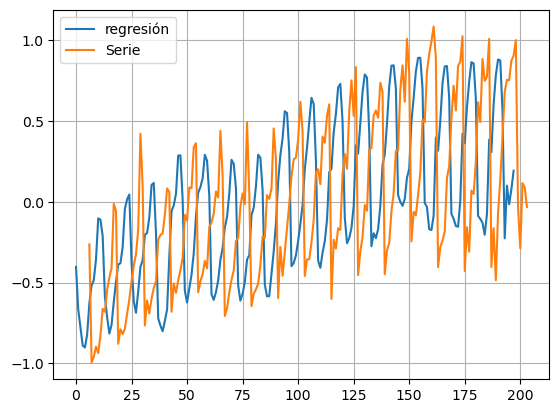

In [59]:
y=nnet(X)
plt.plot(y,label='regresión')
plt.plot(Y/2,label='Serie')
plt.legend()
plt.grid()

## Ejemplo: Visualizando conteos de bicicletas en Seattle

Veamos los conteos de bicicletas en el [Puente Fremont de Seattle](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
Estos datos provienen de un contador automático de bicicletas instalado a finales de 2012, que tiene sensores inductivos en las aceras este y oeste del puente.

Los conteos horarios de bicicletas pueden descargarse de [http://data.seattle.gov](http://data.seattle.gov); el conjunto de datos Fremont Bridge Bicycle Counter está disponible en la categoría Transportation.

In [60]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

C:\Users\uie70742\AppData\Local\Temp\ipykernel_21216\107446932.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [61]:
#acortaremos los nombres de las columnas:
data.columns = ['Total', 'East', 'West']

In [62]:
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


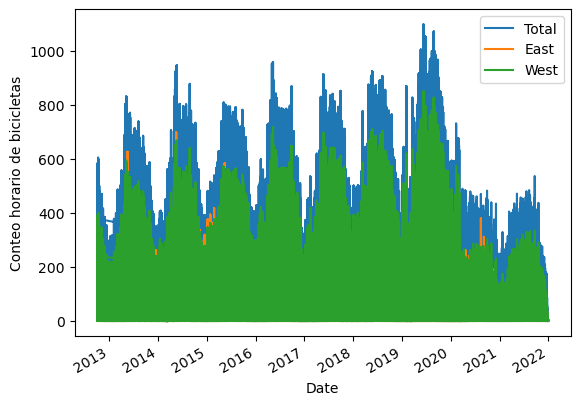

In [63]:
#Visualización de datos
data.plot()
plt.ylabel('Conteo horario de bicicletas');

Las ~150,000 muestras son demasiado densas para que podamos entender mucho

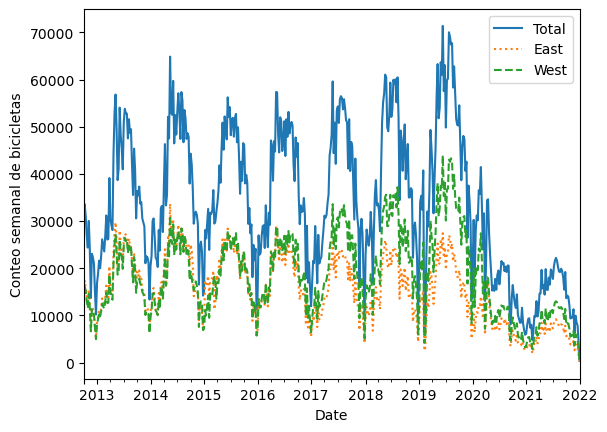

In [64]:
#Visualización de datos remuestradas por semana
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Conteo semanal de bicicletas');

Tendencias: 
- La gente anda más en bicicleta en verano que en invierno, e incluso dentro de una estación particular el uso de la bicicleta varía de semana a semana. Además, el efecto de la pandemia de COVID-19 en los patrones de viaje es bastante claro, comenzando a principios de 2020.

Otra opción útil para agregar los datos es usar una media móvil, utilizando la función `pd.rolling_mean`.
Aquí examinaremos la media móvil de 30 días de nuestros datos, asegurándonos de centrar la ventana.

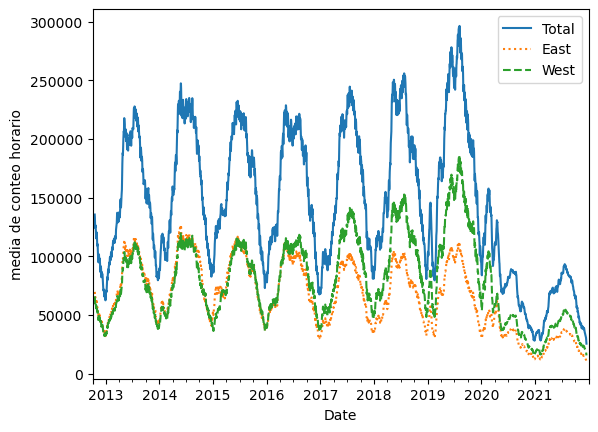

In [65]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('media de conteo horario');

La irregularidad del resultado se debe al corte abrupto de la ventana de tiempo. Podemos obtener una versión más suave de una media móvil usando una ventana gaussiana, 


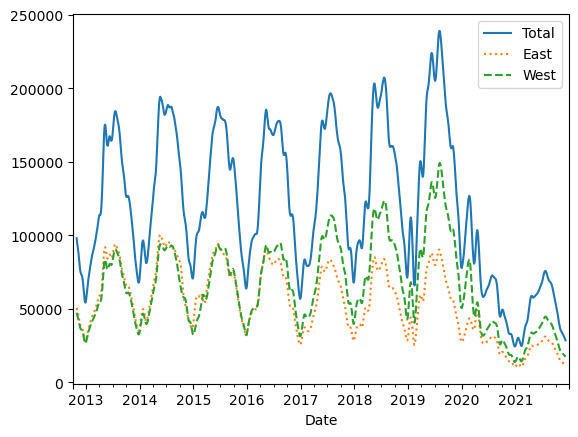

In [66]:
#Ancho de la ventana (aquí, 50 días) como el ancho de la ventana gaussiana (aquí, 10 días):
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', ':', '--']);

Si bien estas vistas suavizadas de los datos son útiles para tener una idea de la tendencia general, ocultan gran parte de la estructura.
Por ejemplo, podríamos querer ver el tráfico promedio en función de la hora del día.

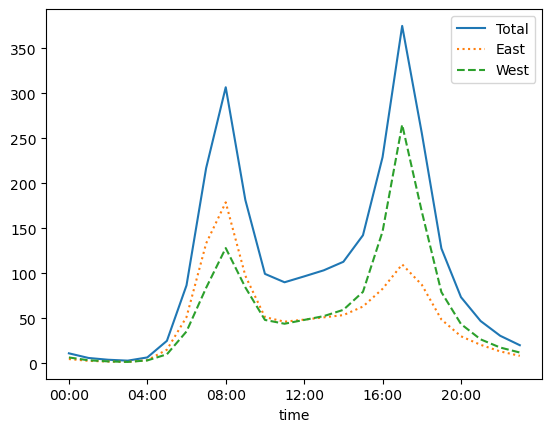

In [67]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--']);

El tráfico horario es una secuencia fuertemente bimodal, con picos alrededor de las 8:00 a.m. y las 5:00 p.m.
Esto probablemente evidencia un fuerte componente de tráfico de personas que van al trabajo.
También hay un componente direccional: según los datos, la acera este se usa más durante el viaje matutino, y la acera oeste se usa más durante el viaje vespertino.

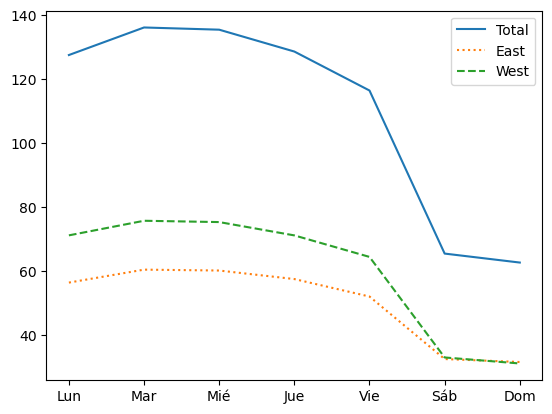

In [68]:
#cómo cambian las cosas según el día de la semana
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
by_weekday.plot(style=['-', ':', '--']);

Esto muestra una fuerte distinción entre los totales de días laborables y fines de semana, con aproximadamente el doble de ciclistas promedio cruzando el puente de lunes a viernes que los sábados y domingos.

In [69]:
# veamos las tendencias horarias en días laborables versus fines de semana.
weekend = np.where(data.index.weekday < 5, 'Día laborable', 'Fin de semana')
by_time = data.groupby([weekend, data.index.time]).mean()

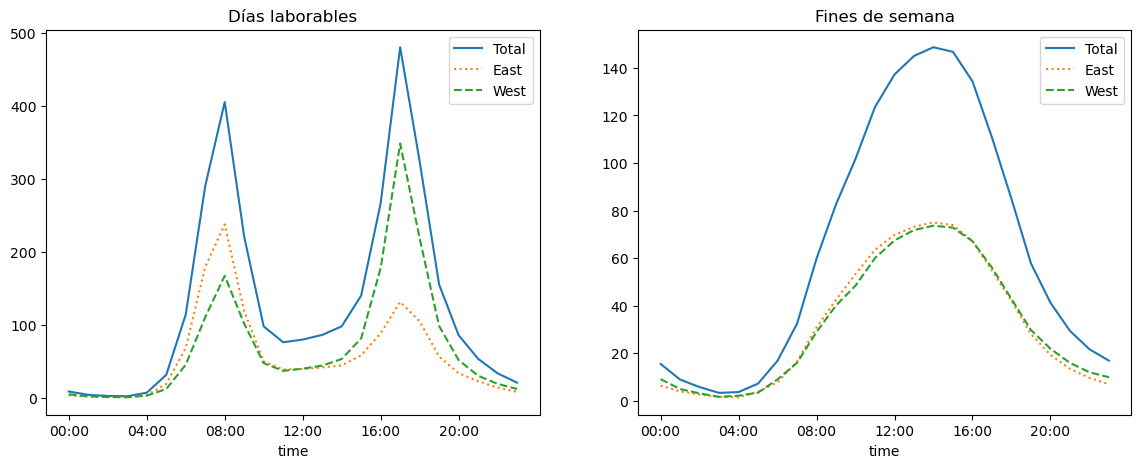

In [70]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Día laborable'].plot(ax=ax[0], title='Días laborables',
                            xticks=hourly_ticks, style=['-', ':', '--'])
by_time.loc['Fin de semana'].plot(ax=ax[1], title='Fines de semana',
                            xticks=hourly_ticks, style=['-', ':', '--']);

El resultado muestra un patrón de viaje bimodal durante la semana laboral y un patrón unimodal recreativo durante los fines de semana.
Podría ser interesante profundizar en estos datos y examinar los efectos del clima, la temperatura, la época del año y otros factores en los patrones de viaje de las personas, etc...